In [19]:
#pip install mysql-connector-python
import pandas as pd
import numpy as np
#import mysql.connector
#from mysql.connector import Error

import plotly.express as px
import plotly.io as pio

import plotly.express as px


from plotly.subplots import make_subplots
import plotly.graph_objects as go
#pip install -U kaleido


In [20]:
raw_df = pd.read_csv('cap_df_final.csv')

print(raw_df.shape)
df2 = raw_df.drop_duplicates(subset=['device_id'], keep='first', inplace=False)

#bins = [5,16,25,30,35, 45, 50,60,90]

print(df2.shape)

(533515, 14)
(9538, 14)


In [21]:
#raw_df.head()
df=raw_df



D:\anaconda\instn\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\anaconda\instn\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



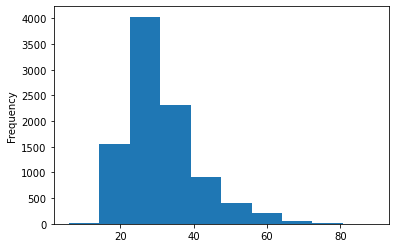

In [29]:
bins = [5,20,25,30,40, 45,60,90]
df['age_bins'] = pd.cut(df['age'], bins)
df['age_bins'] = df['age_bins'].apply(lambda x: str(x))

dfuniqdata=df2

dfuniqdata['age_bins'] = pd.cut(dfuniqdata['age'], bins)
dfuniqdata['age'].plot(kind='hist')
#dfuniqdata.info()

dfuniqdata['age_bins'] = dfuniqdata['age_bins'].apply(lambda x: str(x))


In [30]:
dfg = df.groupby(['gender']).count().reset_index().sort_values(['city'],ascending=False)
g1=dfg.head(10)
dfg = dfuniqdata.groupby(['gender']).count().reset_index().sort_values(['city'],ascending=False)
g2=dfg.head(10)
dfg = df.groupby(['age_bins']).count().reset_index().sort_values(['city'],ascending=False)
g3=dfg.head(10)
dfg = dfuniqdata.groupby(['age_bins']).count().reset_index().sort_values(['city'],ascending=False)
g4=dfg.head(10)

In [31]:


# Initialize figure with subplots


#fig.add_trace(go.pie(x=labels, y=datavals,name=title1), row=i, col=1)
    

   

labels = ['1st', '2nd', '3rd', '4th', '5th']

# Define color sets of paintings


# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs,vertical_spacing=0.4,
                    subplot_titles=['Users Activity','Users','Activity across Age Segment','Users across AgeSegment'])


fig.add_trace(go.Pie(labels=g1['gender'], values=g1['city'], name='Starry Night'
                    , textinfo='label+percent'), 1, 1)
fig.add_trace(go.Pie(labels=g2['gender'], values=g2['city'], name='Starry Night'
                    , textinfo='label+percent'), 1, 2)
fig.add_trace(go.Pie(labels=g3['age_bins'], values=g3['city'], name='Starry Night'
                    , textinfo='label+percent'), 2, 1)
fig.add_trace(go.Pie(labels=g4['age_bins'], values=g4['city'], name='Starry Night'
                    , textinfo='label+percent'), 2, 2)

# Define pie charts
#fig.add_trace(go.Pie(g1, values='city', names='state', title='Distribution of users across states'))
#fig.add_trace(go.Pie(g1, values='city', names='state', title='Distribution of users across states'))
#fig.add_trace(go.Pie(g1, values='city', names='state', title='Distribution of users across states'))
#fig.add_trace(go.Pie(g1, values='city', names='state', title='Distribution of users across states'))

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='label+percent',hole=.5,)
fig.update(layout_title_text='User Activity',
           layout_showlegend=True)
fig.layout.annotations[0].update(y=1.05)
fig.layout.annotations[2].update(y=.35)
fig.layout.annotations[1].update(y=1.05)
fig.layout.annotations[3].update(y=.35)
fig = go.Figure(fig)
fig.show()
fig.write_image("imgcap/fig1.png")
#print(fig.layout)
#df = px.data.tips()
#fig = px.bar(g1, x="state", y="city", color='gender')

#fig.layout.template = 'plotly'
#fig.update_layout(title="Users across State"
                 
#fig.show()